# CardioCheck

### Alunos:
 - GIAN CARLO FAVA
 - FELIPE FERREIRA REZENDE
 - KEVIN DE ALMEIDA BRANDAO
 - SILVIO ALVES DA SILVA JUNIOR

## Carregando os dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix

#importando o arquivo
df = pd.read_csv('/content/drive/My Drive/Datasets/heart.csv', sep=',')
df.head()

Mounted at /content/drive


age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0

## Pré-processamento: tratamento de atributos com valores ausentes

In [ ]:
# índices das linhas que contém valores NaN
idxRowNan = pd.isnull(df).any(axis=1).to_numpy().nonzero()

# imprime apenas as linhas com valoes ausentes
display(df.iloc[idxRowNan])

Empty DataFrame
Columns: [age, sex, chest pain type, resting bp s, cholesterol, fasting blood sugar, resting ecg, max heart rate, exercise angina, oldpeak, ST slope, target]
Index: []

## Pré-processamento: tratamento de dados inconsistentes ou redundantes

In [ ]:
df_duplicates = df[ df.duplicated(subset=['age','sex','chest pain type','resting bp s', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope'],keep=False)]

# se houver valores redundantes ou inconsistentes, imprima
if len(df_duplicates)>0:
    print('\nAmostras redundantes ou inconsistentes:')
    display(df_duplicates)
else:
    print('Não existem valores duplicados')


Amostras redundantes ou inconsistentes:


age  sex  chest pain type  resting bp s  cholesterol  \
90     49    0                2           110          208   
163    49    0                2           110          208   
556    58    1                3           150          219   
604    58    1                3           150          219   
617    70    1                4           130          322   
...   ...  ...              ...           ...          ...   
1156   42    1                3           130          180   
1157   61    1                4           140          207   
1158   66    1                4           160          228   
1159   46    1                4           140          311   
1160   71    0                4           112          149   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
90                      0            0             160                0   
163                     0            0             160                0   
556                     0            1             118                1   
604                     0            1             118                1   
617                     0            2             109                0   
...                   ...          ...             ...              ...   
1156                    0            0             150                0   
1157                    0            2             138                1   
1158                    0            2             138                0   
1159                    0            0             120                1   
1160                    0            0             125                0   

      oldpeak  ST slope  target  
90        0.0         1       0  
163       0.0         1       0  
556       0.0         2       1  
604       0.0         2       1  
617       2.4         2       1  
...       ...       ...     ...  
1156      0.0         1       0  
1157      1.9         1       1  
1158      2.3         1       0  
1159      1.8         2       1  
1160      1.6         2       0  

[544 rows x 12 columns]

In [ ]:
def delDuplicatas(df):
   '''
   Para cada grupo de amostras duplicadas, mantém uma e apaga as demais
   '''

   # remove as amostras duplicadas, mantendo apenas a primeira ocorrencia
   df = df.drop_duplicates(keep = 'first')

   return df

df = delDuplicatas(df)

display(df)

age  sex  chest pain type  resting bp s  cholesterol  \
0      40    1                2           140          289   
1      49    0                3           160          180   
2      37    1                2           130          283   
3      48    0                4           138          214   
4      54    1                3           150          195   
...   ...  ...              ...           ...          ...   
1185   45    1                1           110          264   
1186   68    1                4           144          193   
1187   57    1                4           130          131   
1188   57    0                2           130          236   
1189   38    1                3           138          175   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0             172                0   
1                       0            0             156                0   
2                       0            1              98                0   
3                       0            0             108                1   
4                       0            0             122                0   
...                   ...          ...             ...              ...   
1185                    0            0             132                0   
1186                    1            0             141                0   
1187                    0            0             115                1   
1188                    0            2             174                0   
1189                    0            0             173                0   

      oldpeak  ST slope  target  
0         0.0         1       0  
1         1.0         2       1  
2         0.0         1       0  
3         1.5         2       1  
4         0.0         1       0  
...       ...       ...     ...  
1185      1.2         2       1  
1186      3.4         2       1  
1187      1.2         2       1  
1188      0.0         2       1  
1189      0.0         1       0  

[918 rows x 12 columns]

In [ ]:
def delInconsistencias(df):
   '''
   Remove todas as amostras inconsistentes da base de dados
   '''

   df = df.drop_duplicates(subset=['age','sex','chest pain type','resting bp s', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope'], keep = False)
   return df

df = delInconsistencias(df)

# obtém apenas as amostras onde os valores dos atributos estão duplicados
df_duplicates = df[ df.duplicated(subset=['age','sex','chest pain type','resting bp s', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope'],keep=False)]

# se tiver valores redundantes ou inconsistentes, imprime
if len(df_duplicates)>0:
   display(df_duplicates)
else:
   print('Não existem amostras redundantes ou inconsistentes')

Não existem amostras redundantes ou inconsistentes


In [ ]:
# apresenta as principais estatísticas da base de dados
df_detalhes = df.describe()

display(df_detalhes)

age         sex  chest pain type  resting bp s  cholesterol  \
count  918.000000  918.000000       918.000000    918.000000   918.000000   
mean    53.510893    0.789760         3.251634    132.396514   198.799564   
std      9.432617    0.407701         0.931031     18.514154   109.384145   
min     28.000000    0.000000         1.000000      0.000000     0.000000   
25%     47.000000    1.000000         3.000000    120.000000   173.250000   
50%     54.000000    1.000000         4.000000    130.000000   223.000000   
75%     60.000000    1.000000         4.000000    140.000000   267.000000   
max     77.000000    1.000000         4.000000    200.000000   603.000000   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
count           918.000000   918.000000      918.000000       918.000000   
mean              0.233115     0.603486      136.809368         0.404139   
std               0.423046     0.805968       25.460334         0.490992   
min               0.000000     0.000000       60.000000         0.000000   
25%               0.000000     0.000000      120.000000         0.000000   
50%               0.000000     0.000000      138.000000         0.000000   
75%               0.000000     1.000000      156.000000         1.000000   
max               1.000000     2.000000      202.000000         1.000000   

          oldpeak    ST slope      target  
count  918.000000  918.000000  918.000000  
mean     0.887364    1.636166    0.553377  
std      1.066570    0.609341    0.497414  
min     -2.600000    0.000000    0.000000  
25%      0.000000    1.000000    0.000000  
50%      0.600000    2.000000    1.000000  
75%      1.500000    2.000000    1.000000  
max      6.200000    3.000000    1.000000

## Pré-processamento: normalização dos atributos

In [ ]:
def normalizar(X):
   """
   Normaliza os atributos em X

   Esta função retorna uma versao normalizada de X onde o valor da
   média de cada atributo é igual a 0 e desvio padrao é igual a 1. Trata-se de
   um importante passo de pré-processamento quando trabalha-se com
   métodos de aprendizado de máquina.
   """

   m, n = X.shape # m = qtde de objetos e n = qtde de atributos por objeto

   # Incializa as variaves de saída
   X_norm = np.random.rand(m,n) # inicializa X_norm com valores aleatórios
   mu = 0 # inicializa a média
   sigma = 1 # inicializa o desvio padrão

   mu = np.mean(X, axis=0)
   sigma = np.std(X, axis=0, ddof=1)

   for i in range(m):
       X_norm[i,:] = (X[i,:]-mu) / sigma


   return X_norm, mu, sigma


# Identificar colunas contínuas e discretas
# Baseado na descrição das colunas e tipos de dados
continuous_cols = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
discrete_cols = ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope']

# Separar as colunas
df_continuous = df[continuous_cols]
df_discrete = df[discrete_cols]

# Converter colunas contínuas para numpy array para normalização
X_continuous = df_continuous.values

# chama a função para normalizar X_continuous
X_norm_continuous, mu, sigma = normalizar(X_continuous)

# Criar um novo DataFrame com as colunas normalizadas
df_continuous_norm = pd.DataFrame(X_norm_continuous, columns=continuous_cols, index=df.index)

# Combinar as colunas normalizadas e discretas
df = pd.concat([df_continuous_norm, df_discrete, df['target']], axis=1)

print(X_norm_continuous)
print(mu)
print(sigma)

[[-1.43235901  0.41068502  0.82462075  1.38217478 -0.83197888]
 [-0.4782229   1.49093962 -0.17186736  0.75374627  0.10560596]
 [-1.75040438 -0.12944227  0.7697682  -1.5243071  -0.83197888]
 ...
 [ 0.36989808 -0.12944227 -0.61982991 -0.85660181  0.29312293]
 [ 0.36989808 -0.12944227  0.34008984  1.46072835 -0.83197888]
 [-1.64438926  0.30265957 -0.21757783  1.42145157 -0.83197888]]
[ 53.51089325 132.39651416 198.79956427 136.80936819   0.88736383]
[  9.43261651  18.51415412 109.38414455  25.46033414   1.06657015]


In [ ]:
# apresenta as principais estatísticas da base de dados
df_detalhes = df.describe()

display(df_detalhes.round(8))

age  resting bp s  cholesterol  max heart rate     oldpeak  \
count  918.000000    918.000000   918.000000      918.000000  918.000000   
mean    -0.000000      0.000000     0.000000        0.000000    0.000000   
std      1.000000      1.000000     1.000000        1.000000    1.000000   
min     -2.704540     -7.151097    -1.817444       -3.016825   -3.269699   
25%     -0.690253     -0.669570    -0.233576       -0.660218   -0.831979   
50%      0.051853     -0.129442     0.221243        0.046764   -0.269428   
75%      0.687943      0.410685     0.623495        0.753746    0.574398   
max      2.490201      3.651449     3.695238        2.560478    4.981047   

              sex  chest pain type  fasting blood sugar  resting ecg  \
count  918.000000       918.000000           918.000000   918.000000   
mean     0.789760         3.251634             0.233115     0.603486   
std      0.407701         0.931031             0.423046     0.805968   
min      0.000000         1.000000             0.000000     0.000000   
25%      1.000000         3.000000             0.000000     0.000000   
50%      1.000000         4.000000             0.000000     0.000000   
75%      1.000000         4.000000             0.000000     1.000000   
max      1.000000         4.000000             1.000000     2.000000   

       exercise angina    ST slope      target  
count       918.000000  918.000000  918.000000  
mean          0.404139    1.636166    0.553377  
std           0.490992    0.609341    0.497414  
min           0.000000    0.000000    0.000000  
25%           0.000000    1.000000    0.000000  
50%           0.000000    2.000000    1.000000  
75%           1.000000    2.000000    1.000000  
max           1.000000    3.000000    1.000000

In [ ]:
print(sigma)

[  9.43261651  18.51415412 109.38414455  25.46033414   1.06657015]


## Pré-processamento: detecção de *outliers*

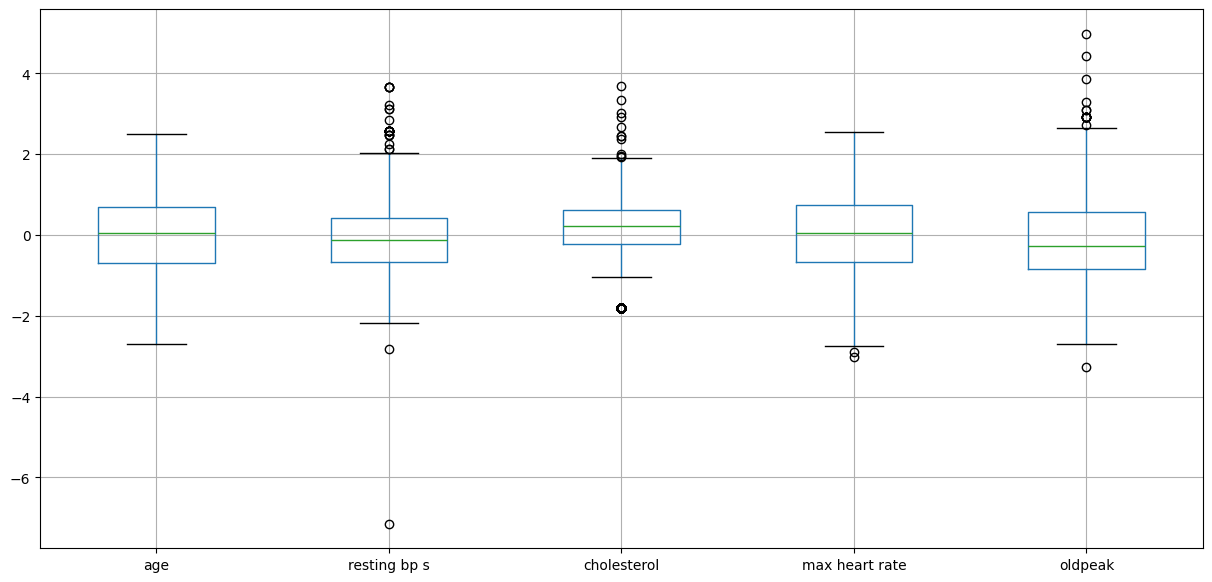

In [ ]:
# gera um bloxplot para cada atributo contínuo
df[continuous_cols].boxplot(figsize=(15,7))
plt.show()

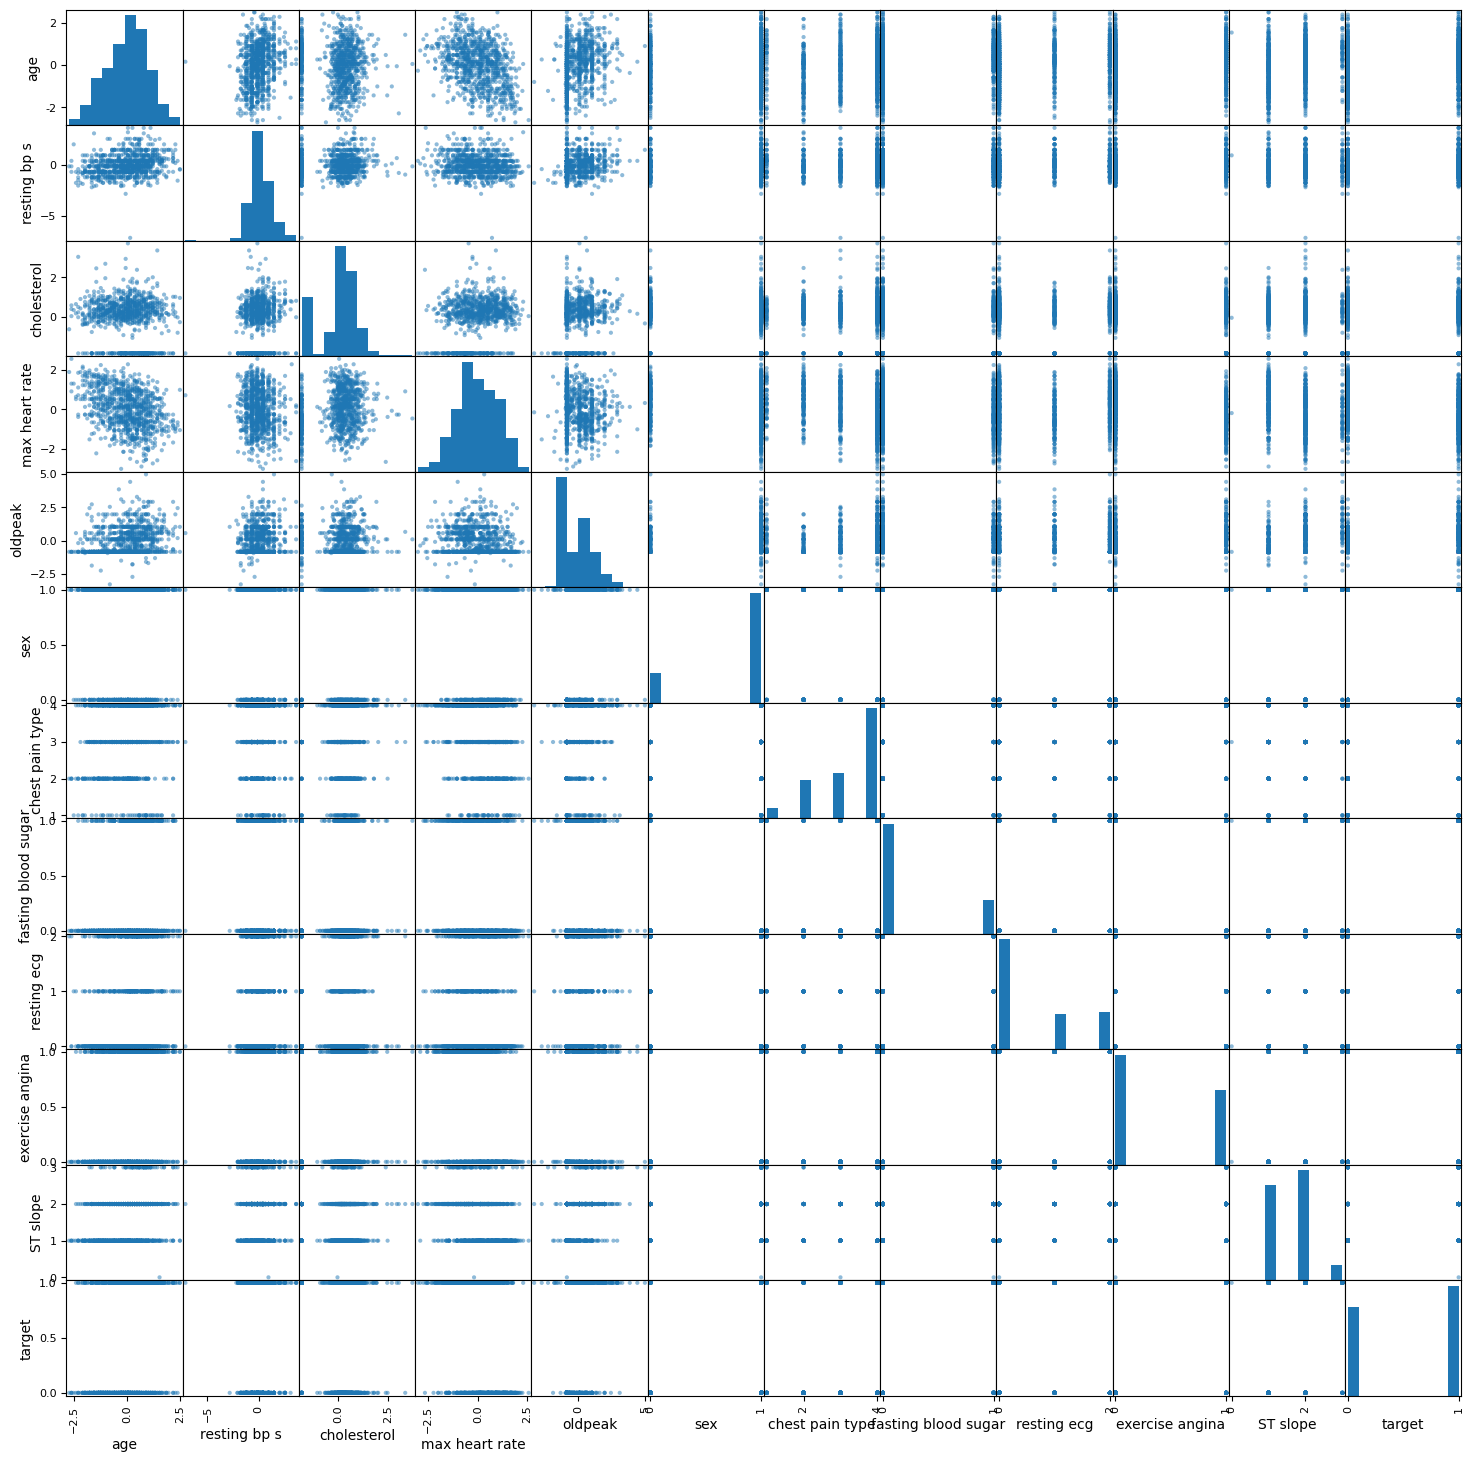

In [ ]:
pd.plotting.scatter_matrix(df, figsize=(18,18))
plt.show()

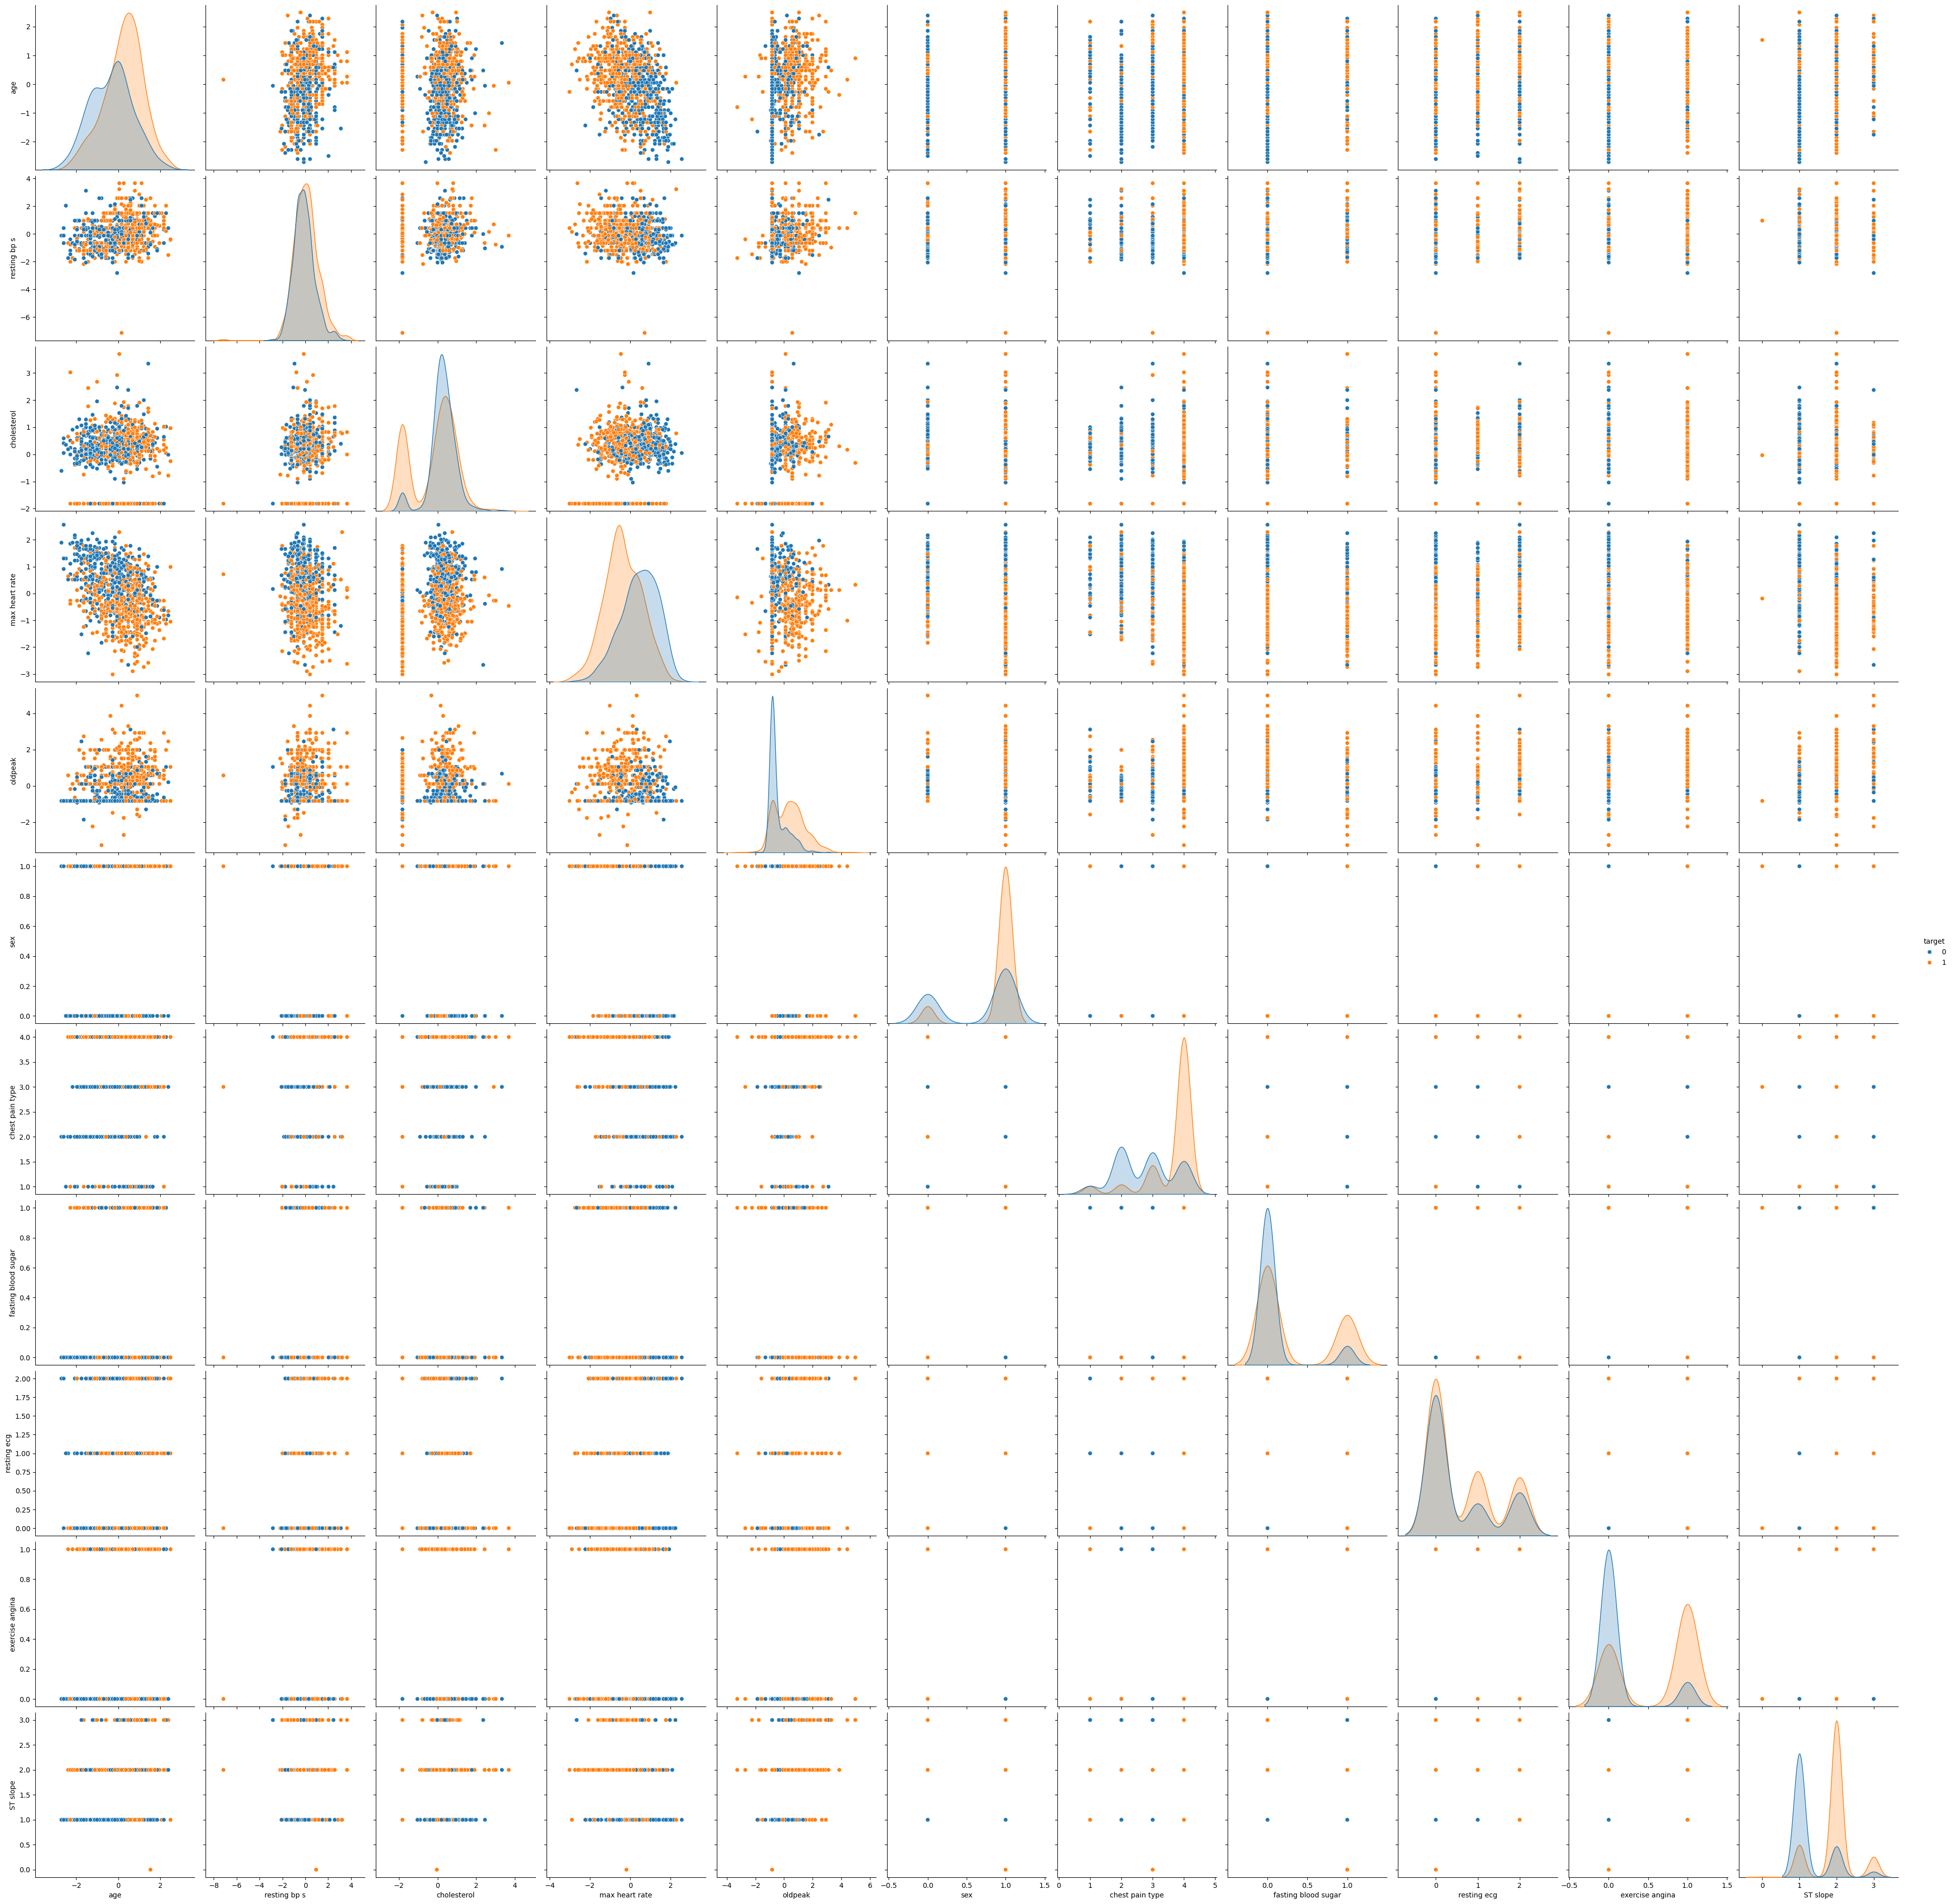

In [ ]:
# matriz de gráficos scatter
sns.pairplot(df, hue='target', height=3.5);

# mostra o gráfico usando a função show() da matplotlib
plt.show()

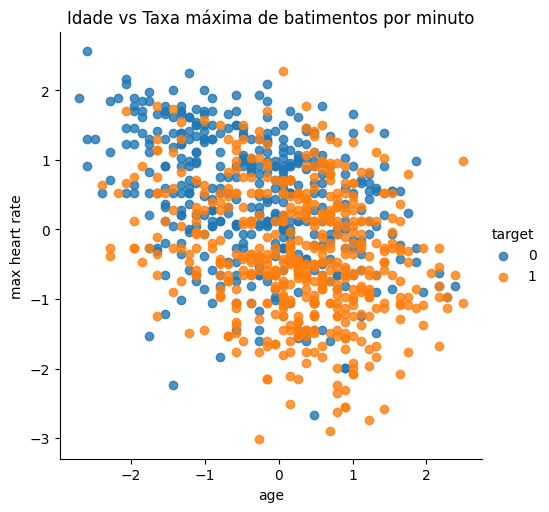

In [ ]:
# define o scatter plot
sns.lmplot(x='age', y='max heart rate', data=df,
          fit_reg=False,
          hue='target')

# cria um título para o gráfico
plt.title('Idade vs Taxa máxima de batimentos por minuto')

# mostra o gráfico
plt.show()

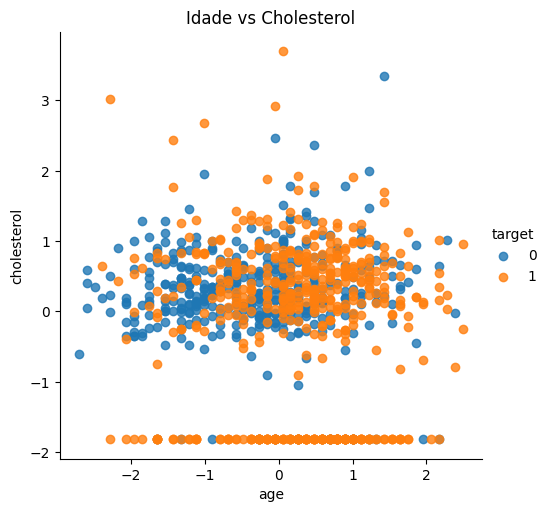

In [ ]:
# define o scatter plot
sns.lmplot(x='age', y='cholesterol', data=df,
          fit_reg=False,
          hue='target')

# cria um título para o gráfico
plt.title('Idade vs Cholesterol')

# mostra o gráfico
plt.show()

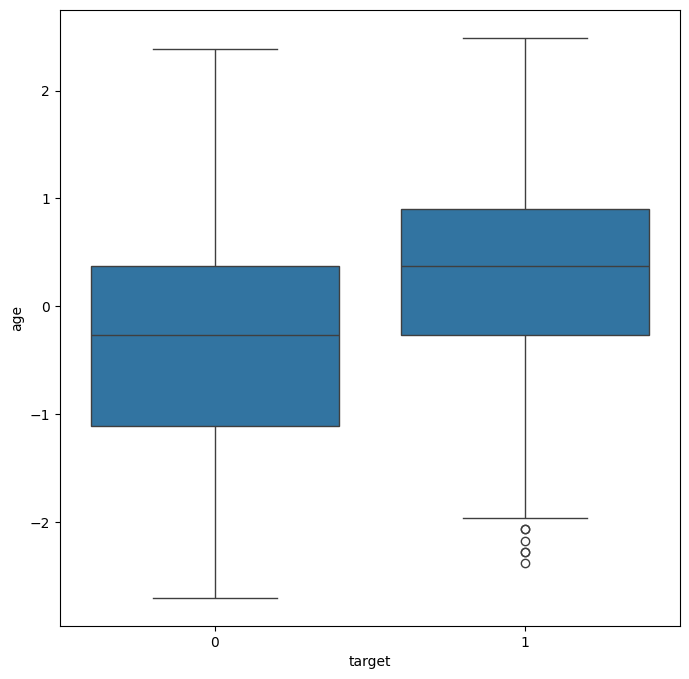

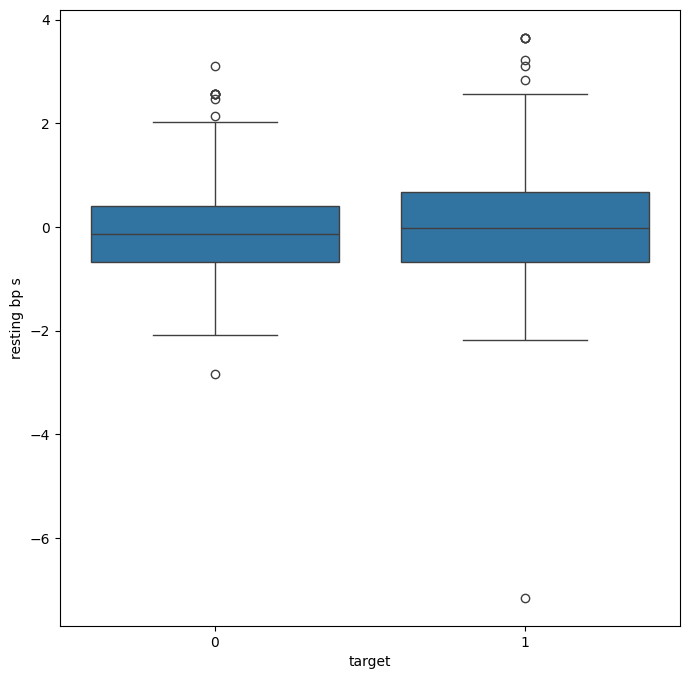

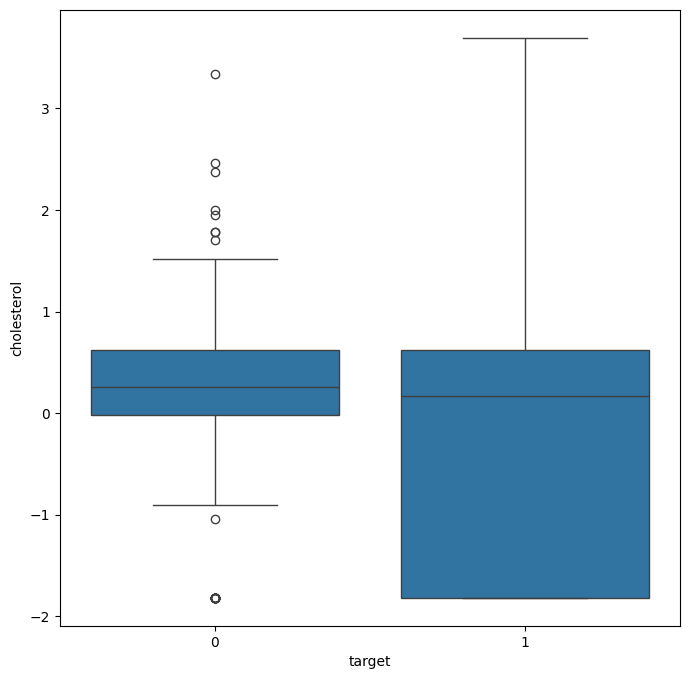

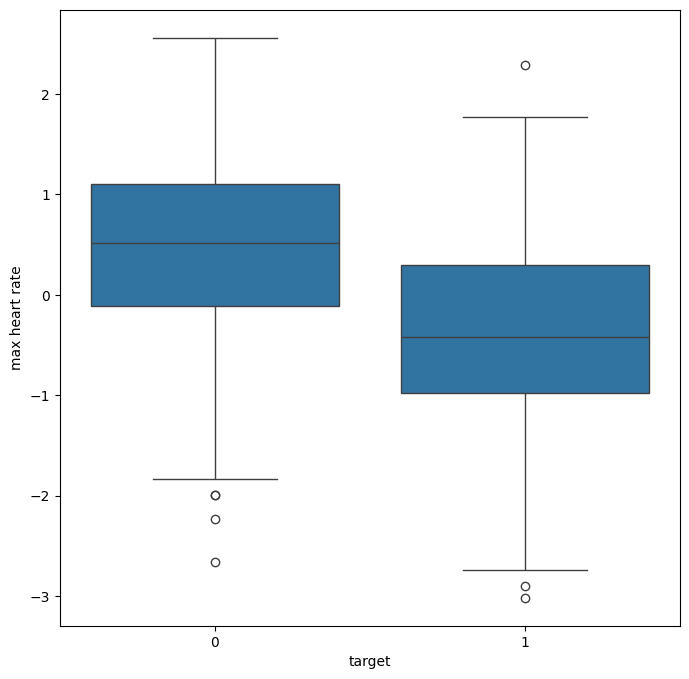

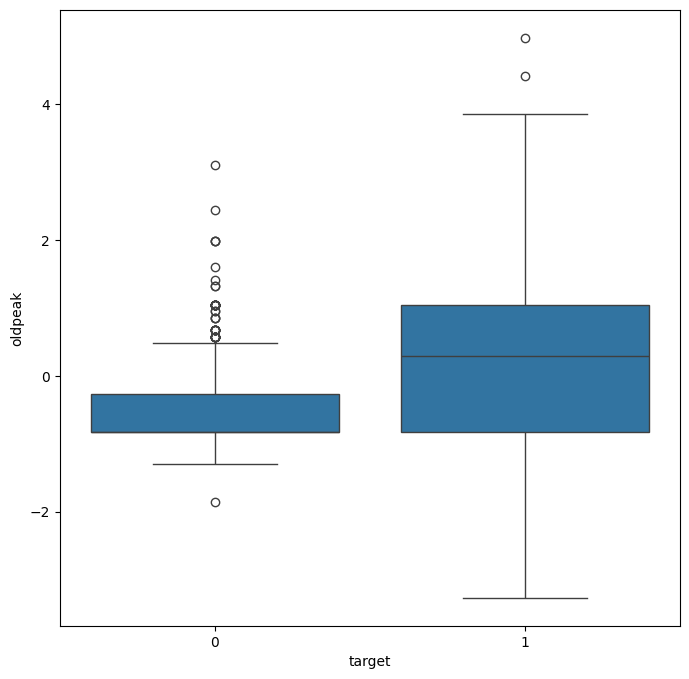

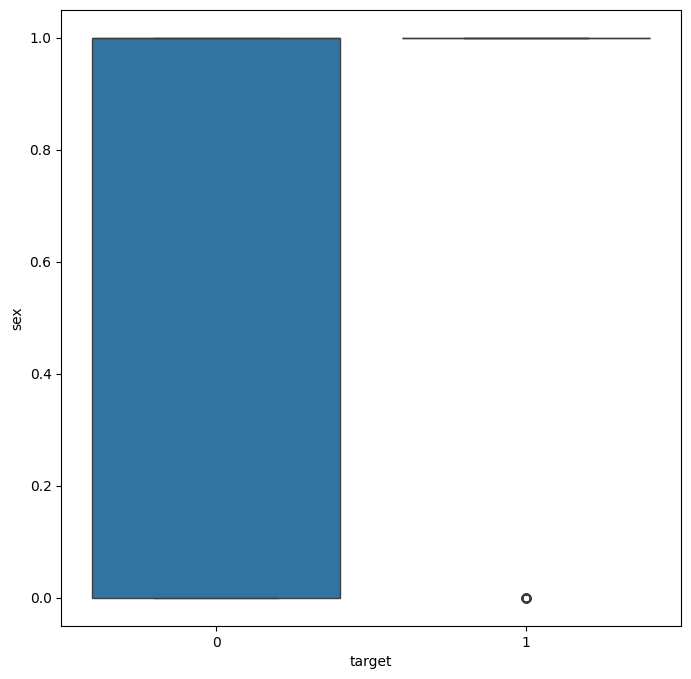

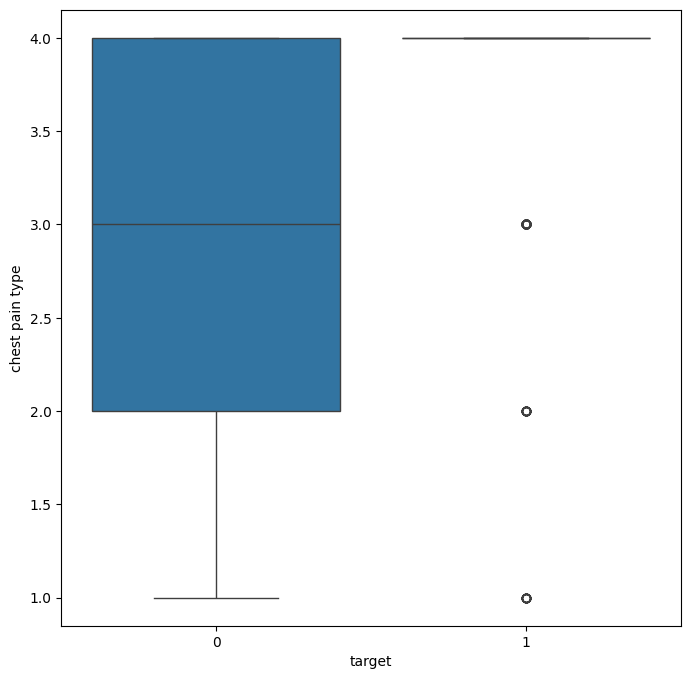

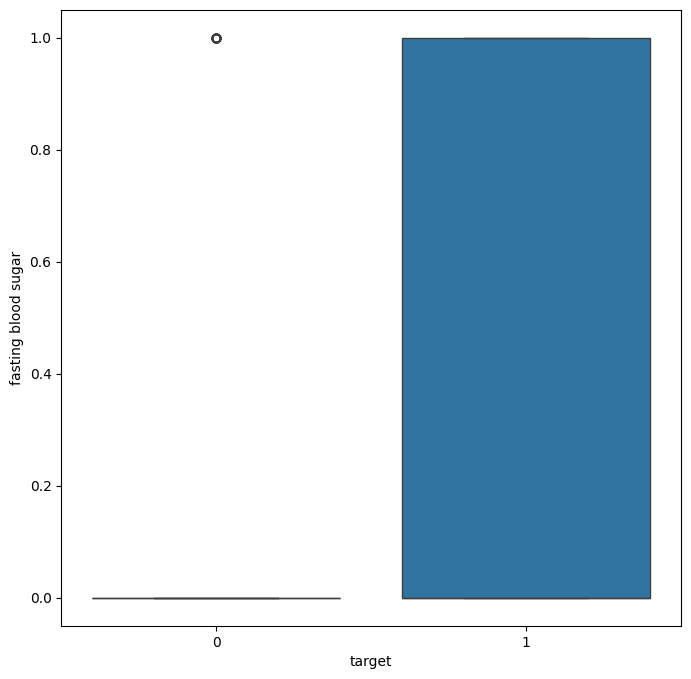

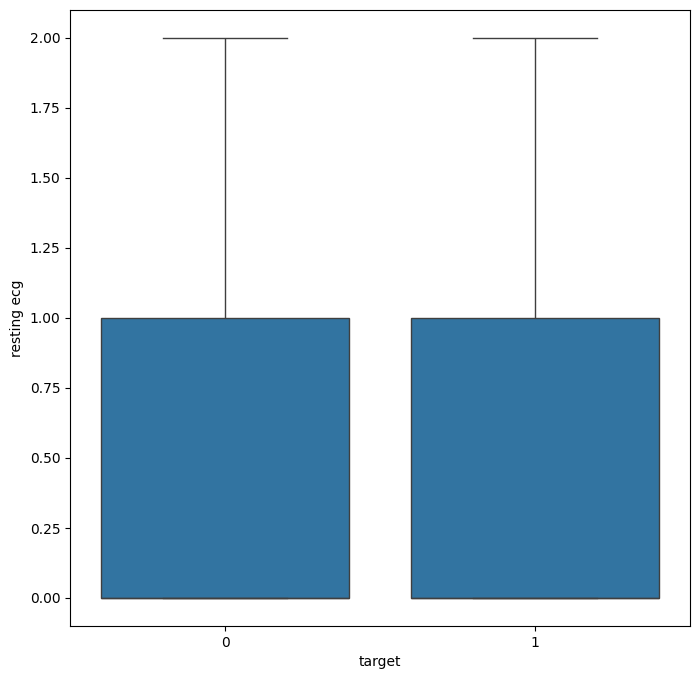

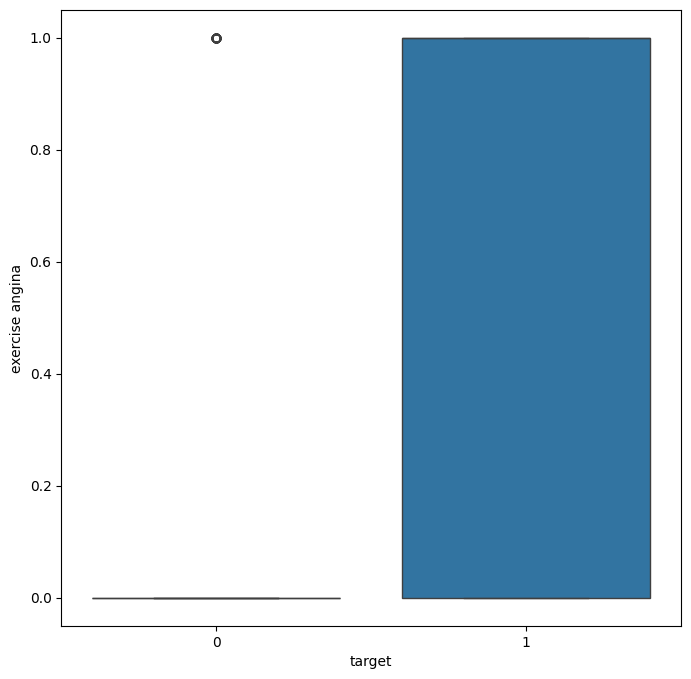

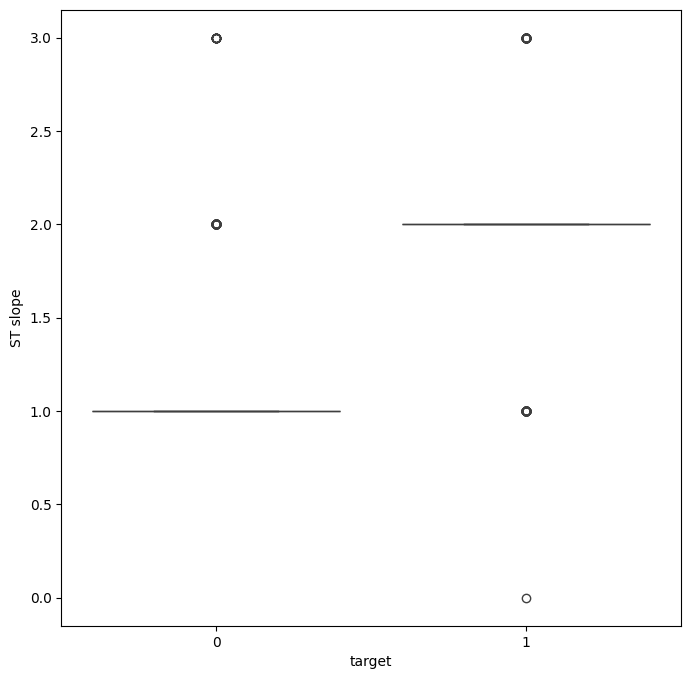

In [ ]:
for atributo in df.columns[:-1]:
   # define a dimensão do gráfico
   plt.figure(figsize=(8,8))

   # cria o boxplot
   sns.boxplot(x="target", y=atributo, data=df, whis=1.5)

   # mostra o gráfico
   plt.show()

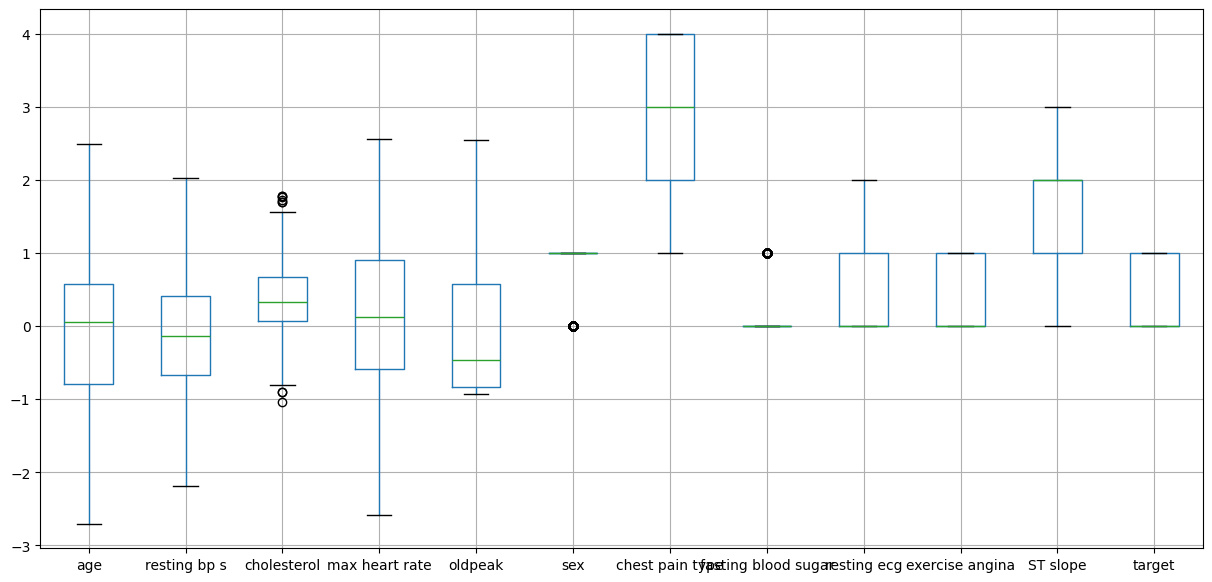

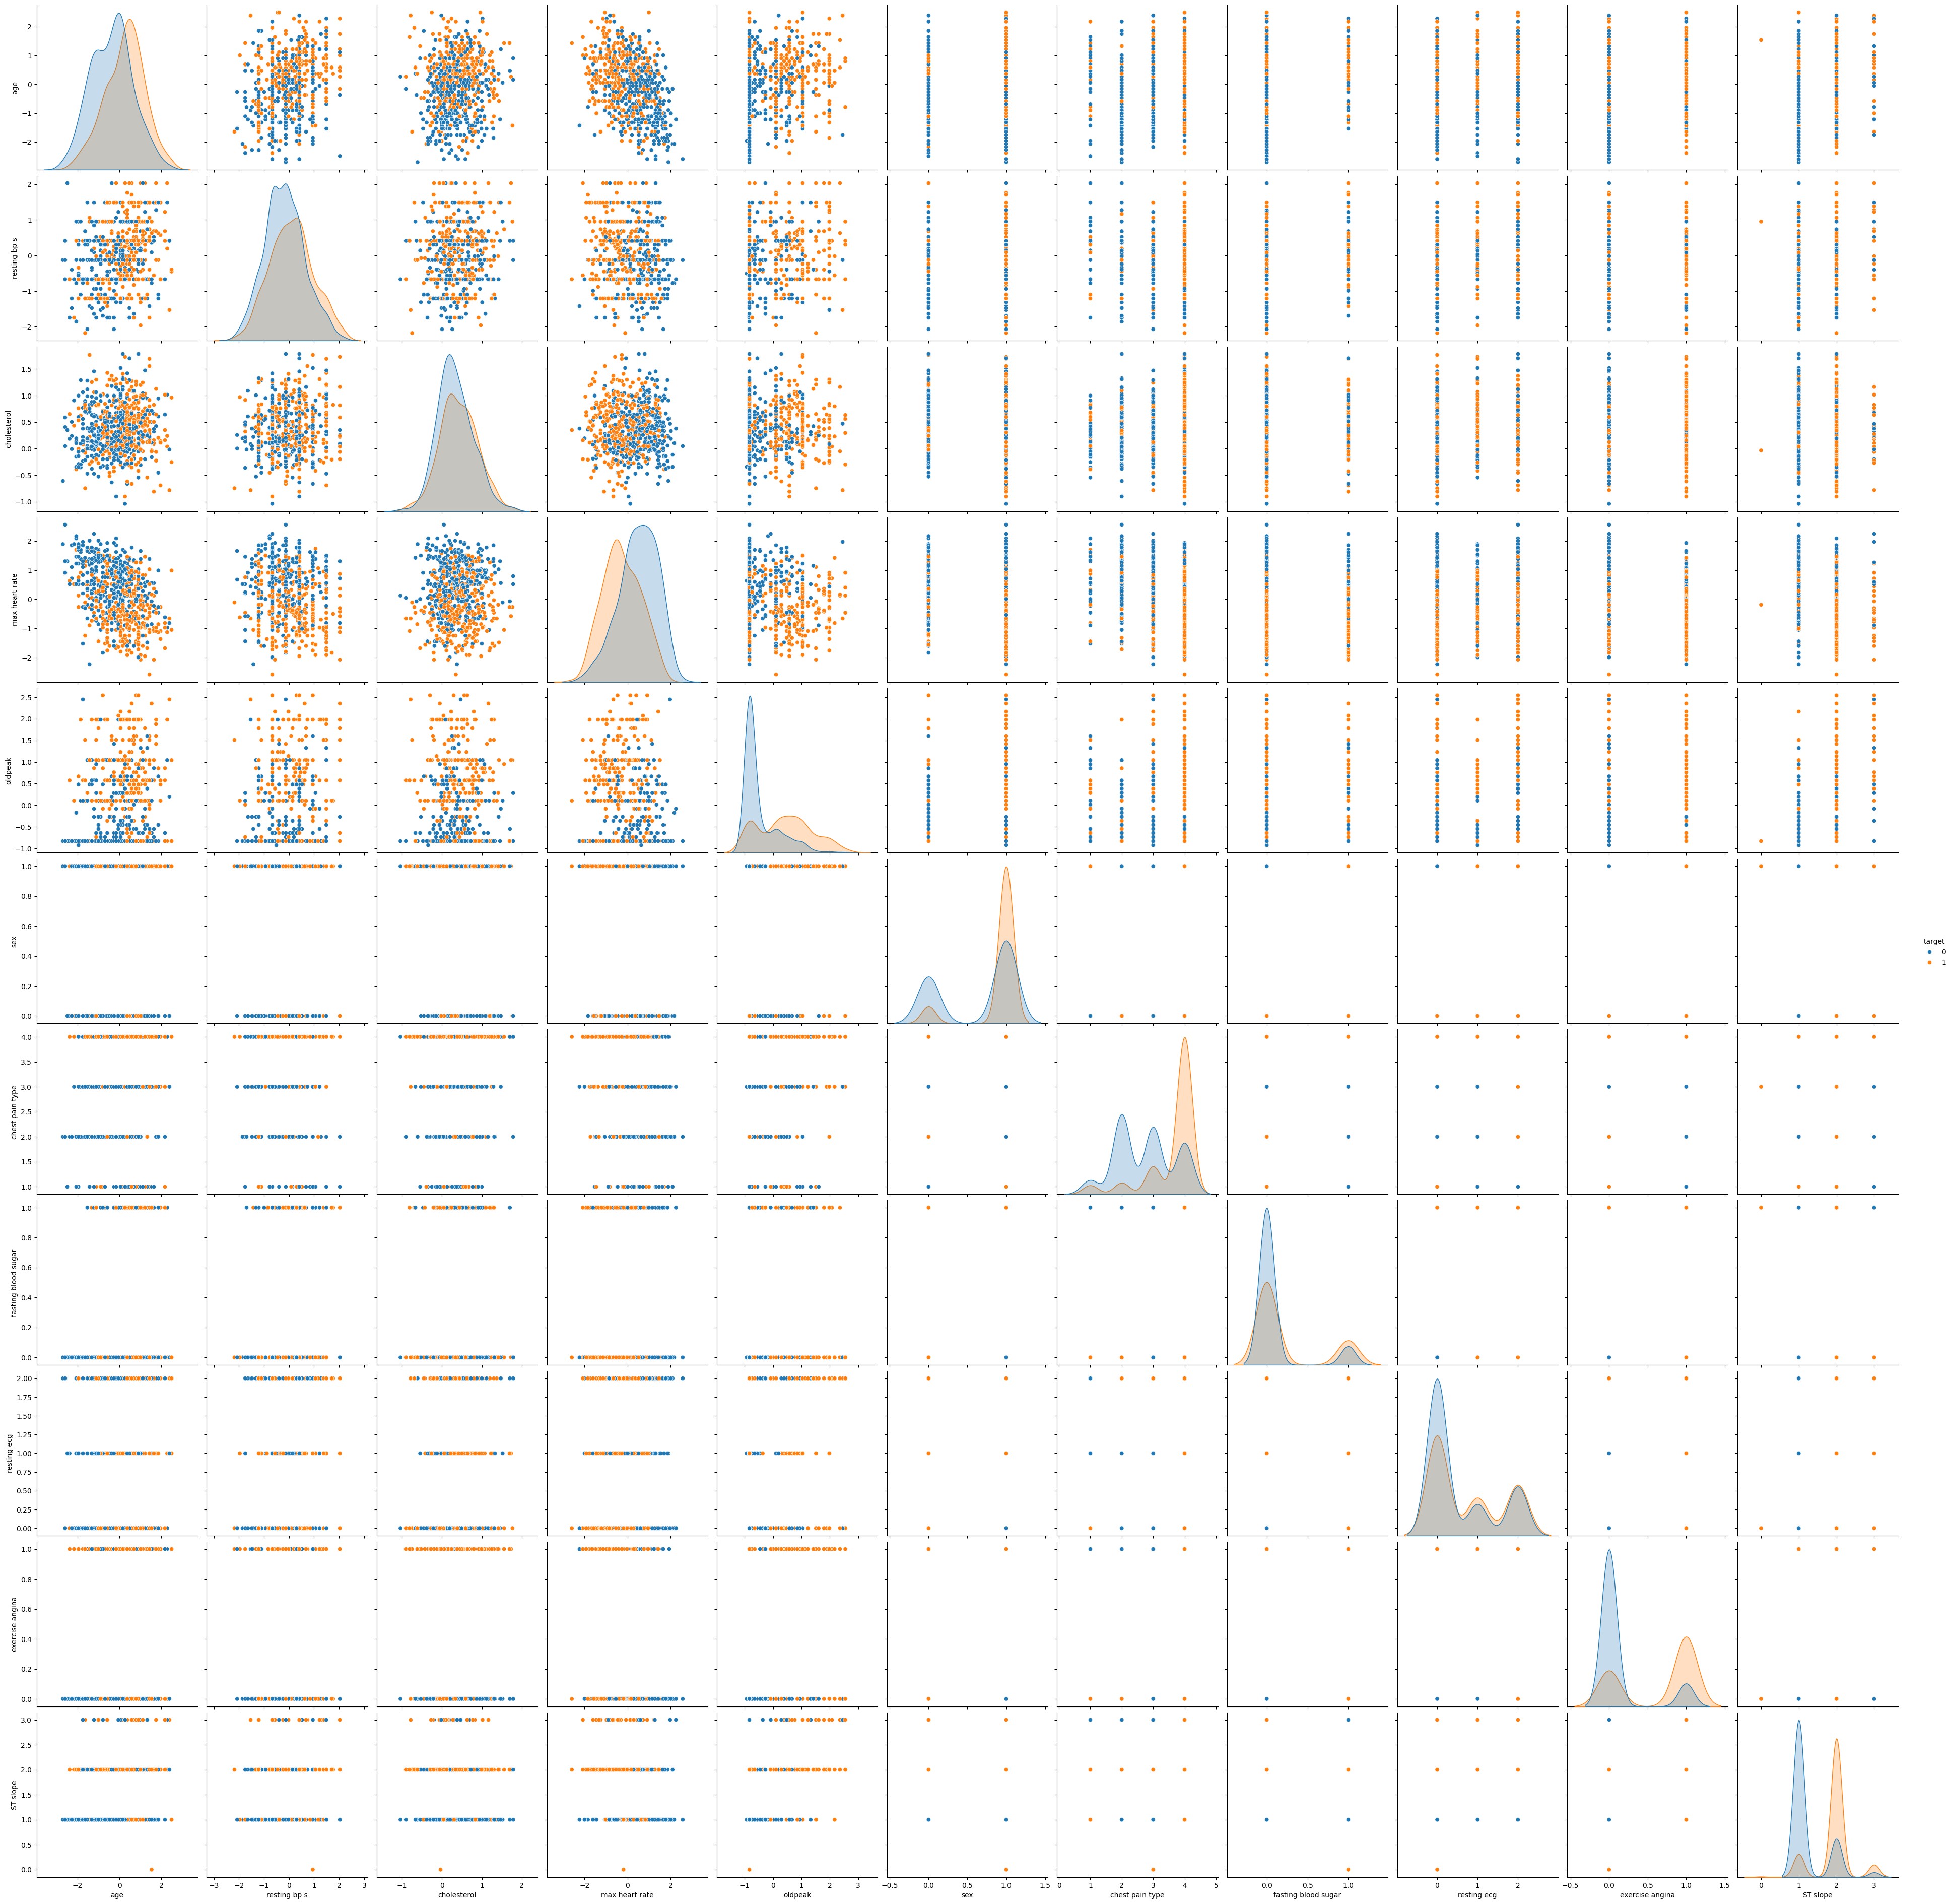

In [ ]:
def removeOutliers(df):
   """
   Remove os outliers da base de dados para atributos contínuos
   """

   # Identificar colunas contínuas
   continuous_cols = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

   for atributo in continuous_cols:

       # obtem o terceiro e o primeiro quartil.
       q75, q25 = np.percentile(df[atributo].values, [75 ,25])

       # calcula o IQR
       IQR = q75 - q25

       # remove os outliers com base no valor do IQR
       df = df[ (df[atributo]<=(q75+1.5*IQR)) & (df[atributo]>=(q25-1.5*IQR)) ]

   return df

# remove os outliers
df = removeOutliers(df)

# apresenta as principais estatísticas sobre a base de dados
df.boxplot(figsize=(15,7))
plt.show()

# matriz de gráficos scatter
sns.pairplot(df, hue='target', height=3.5);

# mostra o gráfico usando a função show() da matplotlib
plt.show()

## Pré-processamento: distribuição das classes

target
0    377
1    324
Name: count, dtype: int64

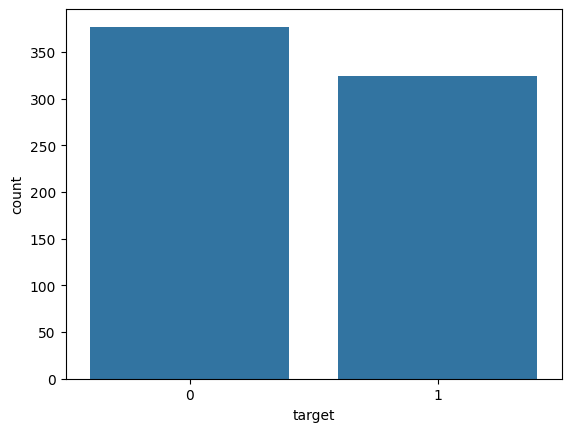

In [ ]:
display(df['target'].value_counts())

# cria um gráfico de barras com a frequência de cada classe
sns.countplot(x="target", data=df)

# mostra o gráfico
plt.show()

## Pré-processamento: correlação entre os atributos

In [ ]:
# criando uma matriz X com os valores do data frame
X = df.iloc[:,:-1].values

# matriz de correlação
correlation = np.corrcoef(X, rowvar=False)

print('\n\nMatriz de correlação: ')
display(correlation)



Matriz de correlação: 


array([[ 1.00000000e+00,  2.70978344e-01,  7.04099874e-02,
        -4.02907530e-01,  2.83910044e-01,  6.43129696e-02,
         1.68718943e-01,  2.38198116e-01,  2.17777429e-01,
         2.42903162e-01,  2.66843070e-01],
       [ 2.70978344e-01,  1.00000000e+00,  8.77307797e-02,
        -1.28306204e-01,  1.91033530e-01,  7.44678785e-02,
         3.40715964e-02,  1.74485552e-01,  4.89585491e-02,
         1.52283259e-01,  1.23981055e-01],
       [ 7.04099874e-02,  8.77307797e-02,  1.00000000e+00,
         9.13016019e-04,  6.66378336e-02, -9.55457657e-02,
         5.97551545e-02,  3.11890351e-02,  9.03895638e-02,
         1.04078238e-01,  4.06461174e-02],
       [-4.02907530e-01, -1.28306204e-01,  9.13016019e-04,
         1.00000000e+00, -2.79658485e-01, -1.53232249e-01,
        -3.46066135e-01, -1.12921233e-01,  8.86188679e-03,
        -4.18839085e-01, -3.49894093e-01],
       [ 2.83910044e-01,  1.91033530e-01,  6.66378336e-02,
        -2.79658485e-01,  1.00000000e+00,  1.50280010e-01,
  

In [ ]:
df_values = df.drop(columns=['target'])

# matriz de correlação
df_correlation = df_values.corr()

print('\n\nMatriz de correlação: ')
display(df_correlation)




Matriz de correlação: 


age  resting bp s  cholesterol  max heart rate  \
age                  1.000000      0.270978     0.070410       -0.402908   
resting bp s         0.270978      1.000000     0.087731       -0.128306   
cholesterol          0.070410      0.087731     1.000000        0.000913   
max heart rate      -0.402908     -0.128306     0.000913        1.000000   
oldpeak              0.283910      0.191034     0.066638       -0.279658   
sex                  0.064313      0.074468    -0.095546       -0.153232   
chest pain type      0.168719      0.034072     0.059755       -0.346066   
fasting blood sugar  0.238198      0.174486     0.031189       -0.112921   
resting ecg          0.217777      0.048959     0.090390        0.008862   
exercise angina      0.242903      0.152283     0.104078       -0.418839   
ST slope             0.266843      0.123981     0.040646       -0.349894   

                      oldpeak       sex  chest pain type  fasting blood sugar  \
age                  0.283910  0.064313         0.168719             0.238198   
resting bp s         0.191034  0.074468         0.034072             0.174486   
cholesterol          0.066638 -0.095546         0.059755             0.031189   
max heart rate      -0.279658 -0.153232        -0.346066            -0.112921   
oldpeak              1.000000  0.150280         0.296939             0.068814   
sex                  0.150280  1.000000         0.158048             0.102521   
chest pain type      0.296939  0.158048         1.000000             0.038724   
fasting blood sugar  0.068814  0.102521         0.038724             1.000000   
resting ecg          0.100274  0.002582         0.083479             0.132048   
exercise angina      0.482370  0.212682         0.448078             0.107009   
ST slope             0.599027  0.149968         0.333469             0.139711   

                     resting ecg  exercise angina  ST slope  
age                     0.217777         0.242903  0.266843  
resting bp s            0.048959         0.152283  0.123981  
cholesterol             0.090390         0.104078  0.040646  
max heart rate          0.008862        -0.418839 -0.349894  
oldpeak                 0.100274         0.482370  0.599027  
sex                     0.002582         0.212682  0.149968  
chest pain type         0.083479         0.448078  0.333469  
fasting blood sugar     0.132048         0.107009  0.139711  
resting ecg             1.000000         0.051643  0.106520  
exercise angina         0.051643         1.000000  0.480646  
ST slope                0.106520         0.480646  1.000000

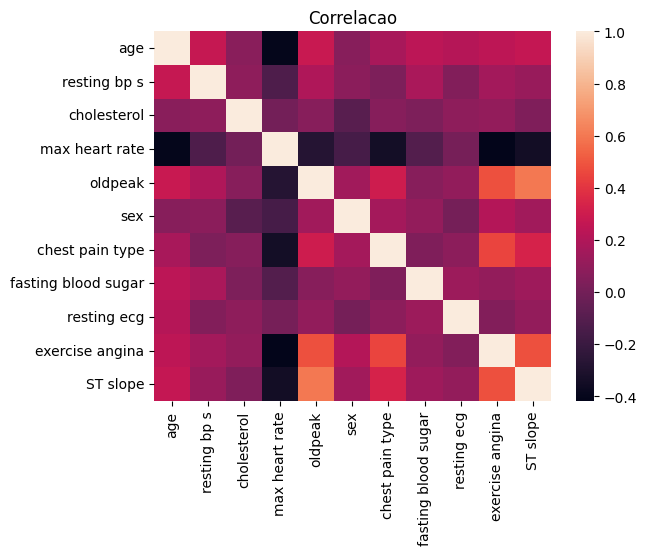

In [ ]:
# cria um mapa de cores dos valores da correlação
sns.heatmap(df_correlation,
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns)

plt.title('Correlacao')
plt.show()

### Principais correlações observadas

Correlações mais Fortes
 - Oldpeak e ST slope (0,599027): A mais forte correlação positiva da matriz, indicando que quanto maior a depressão do segmento ST induzida pelo exercício (oldpeak), maior a inclinação do segmento ST. Esta relação é clinicamente relevante, pois ambas são medidas importantes em testes de esforço cardíaco.

 - Exercise angina e Oldpeak (0,482370): Correlação sugere que pacientes com angina induzida por exercício tendem a apresentar maior depressão do segmento ST.

 - Exercise angina e ST slope (0,480646): Correlação indica que a presença de angina durante exercício está associada a alterações na inclinação do segmento ST.

 - Age e Max heart rate (-0,402908): Confirma o conhecimento médico de que a frequência cardíaca máxima tende a diminuir com o avanço da idade.

 - Exercise angina e Max heart rate (-0,418839): Sugere que pessoas com angina durante exercício tendem a ter frequência cardíaca máxima menor.

 - Chest pain type e Exercise angina (0,448078): Indica relação entre o tipo de dor no peito e a presença de angina durante exercício.

In [ ]:
# Export the processed DataFrame to a new CSV file
df.to_csv('/content/drive/My Drive/Datasets/heart_processed.csv', index=False)

print("Processed data exported successfully!")

Processed data exported successfully!


In [ ]:
# apresenta as principais estatísticas da base de dados após a remoção dos outliers
df_detalhes_processed = df.describe()

print('\n\nPrincipais estatísticas da base de dados após a remoção dos outliers e normalização:')
display(df_detalhes_processed.round(8))

print('\n\nRange de valores para cada atributo após a remoção dos outliers e normalização:')
for col in df.columns:
    print(f"{col}: Min = {df_detalhes_processed.loc['min', col].round(8)}, Max = {df_detalhes_processed.loc['max', col].round(8)}")



Principais estatísticas da base de dados após a remoção dos outliers e normalização:


age  resting bp s  cholesterol  max heart rate     oldpeak  \
count  701.000000    701.000000   701.000000      701.000000  701.000000   
mean    -0.083502     -0.045996     0.371859        0.147842   -0.054492   
std      1.011608      0.833312     0.460197        0.957189    0.899517   
min     -2.704540     -2.181926    -1.040366       -2.584780   -0.925737   
25%     -0.796268     -0.669570     0.065827       -0.581664   -0.831979   
50%      0.051853     -0.129442     0.330948        0.125318   -0.456945   
75%      0.581928      0.410685     0.669205        0.910853    0.574398   
max      2.490201      2.031067     1.784541        2.560478    2.543327   

              sex  chest pain type  fasting blood sugar  resting ecg  \
count  701.000000       701.000000           701.000000   701.000000   
mean     0.760342         3.144080             0.162625     0.634807   
std      0.427179         0.956517             0.369287     0.838801   
min      0.000000         1.000000             0.000000     0.000000   
25%      1.000000         2.000000             0.000000     0.000000   
50%      1.000000         3.000000             0.000000     0.000000   
75%      1.000000         4.000000             0.000000     1.000000   
max      1.000000         4.000000             1.000000     2.000000   

       exercise angina    ST slope      target  
count       701.000000  701.000000  701.000000  
mean          0.373752    1.560628    0.462197  
std           0.484144    0.583919    0.498925  
min           0.000000    0.000000    0.000000  
25%           0.000000    1.000000    0.000000  
50%           0.000000    2.000000    0.000000  
75%           1.000000    2.000000    1.000000  
max           1.000000    3.000000    1.000000



Range de valores para cada atributo após a remoção dos outliers e normalização:
age: Min = -2.70454049, Max = 2.49020054
resting bp s: Min = -2.181926, Max = 2.03106691
cholesterol: Min = -1.04036618, Max = 1.7845405
max heart rate: Min = -2.58478022, Max = 2.56047825
oldpeak: Min = -0.92573736, Max = 2.54332653
sex: Min = 0.0, Max = 1.0
chest pain type: Min = 1.0, Max = 4.0
fasting blood sugar: Min = 0.0, Max = 1.0
resting ecg: Min = 0.0, Max = 2.0
exercise angina: Min = 0.0, Max = 1.0
ST slope: Min = 0.0, Max = 3.0
target: Min = 0.0, Max = 1.0


In [ ]:
# Calculate min and max values for continuous columns without normalization
print('\n\nRange de valores para atributos contínuos antes da normalização:')
for i, col in enumerate(continuous_cols):
    min_val_norm = df_detalhes_processed.loc['min', col]
    max_val_norm = df_detalhes_processed.loc['max', col]
    min_val_original = (min_val_norm * sigma[i]) + mu[i]
    max_val_original = (max_val_norm * sigma[i]) + mu[i]
    print(f"{col}: Min = {min_val_original.round(8)}, Max = {max_val_original.round(8)}")



Range de valores para atributos contínuos antes da normalização:
age: Min = 28.0, Max = 77.0
resting bp s: Min = 92.0, Max = 170.0
cholesterol: Min = 85.0, Max = 394.0
max heart rate: Min = 71.0, Max = 202.0
oldpeak: Min = -0.1, Max = 3.6


## Carregando as bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Informações

In [ ]:
# Dimensão
print(df.shape)

(701, 12)


In [ ]:
print(df.describe())

              age  resting bp s  cholesterol  max heart rate     oldpeak  \
count  701.000000    701.000000   701.000000      701.000000  701.000000   
mean    -0.083502     -0.045996     0.371859        0.147842   -0.054492   
std      1.011608      0.833312     0.460197        0.957189    0.899517   
min     -2.704540     -2.181926    -1.040366       -2.584780   -0.925737   
25%     -0.796268     -0.669570     0.065827       -0.581664   -0.831979   
50%      0.051853     -0.129442     0.330948        0.125318   -0.456945   
75%      0.581928      0.410685     0.669205        0.910853    0.574398   
max      2.490201      2.031067     1.784540        2.560478    2.543327   

              sex  chest pain type  fasting blood sugar  resting ecg  \
count  701.000000       701.000000           701.000000   701.000000   
mean     0.760342         3.144080             0.162625     0.634807   
std      0.427179         0.956517             0.369287     0.838801   
min      0.000000         1

In [ ]:
# Distribuição de classe
print(df.groupby('target').size())

target
0    377
1    324
dtype: int64


## Visualização dos dados

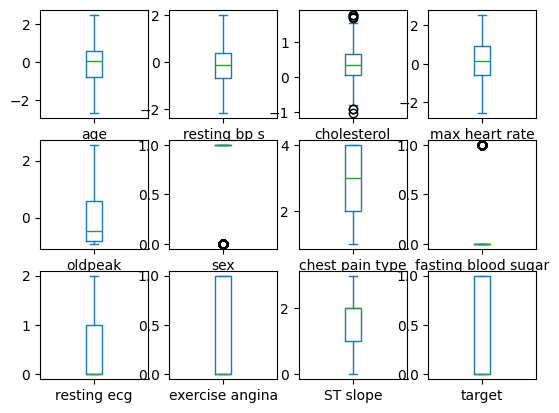

In [ ]:
# gráfico de box and whisker
df.plot(kind='box', subplots=True, layout=(3,4), sharex=False, sharey=False)
plt.show()

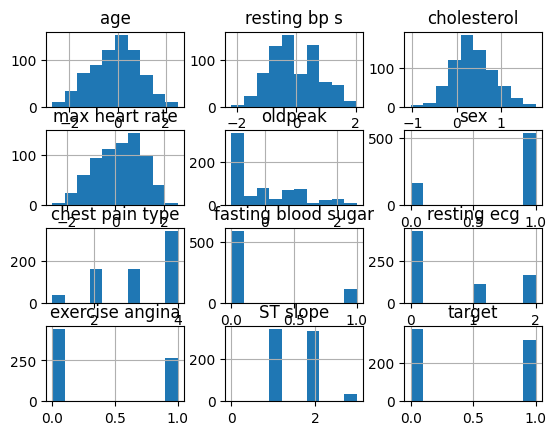

In [ ]:
# histograma
df.hist()
plt.show()

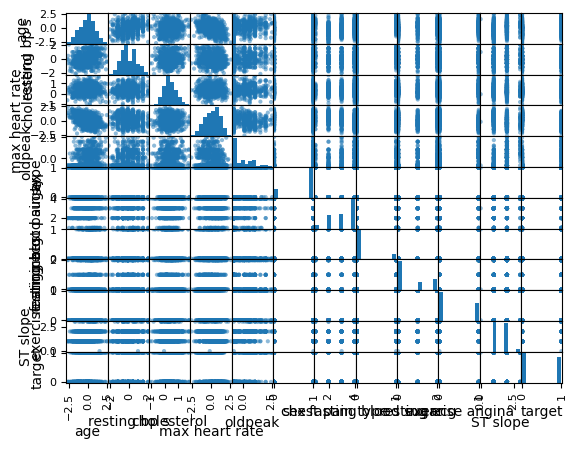

In [ ]:
# gráfico de dispersão
scatter_matrix(df)
plt.show()

## Criar conjunto de validação

In [ ]:
# Conjunto de Validação
array = df.values
X = array[:,0:11]
Y = array[:,11]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

print(X_train.shape)
print(Y_train.shape)

print(X_validation.shape)
print(Y_validation.shape)

(560, 11)
(560,)
(141, 11)
(141,)


In [ ]:
# Métricas
seed = 7
scoring = 'accuracy'

### Regressão Logística (LR)
### Análise Linear Discriminante (LDA)
### K-vizinhos mais próximos (KNN)
### Árvores de Classificação (Decision Tree) e Regressão (CART)
### Gaussian Naive Bayes (NB)
### Support Vector Machines (SVM)

In [ ]:
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
cv_results = model_selection.cross_val_score(DecisionTreeClassifier(), X_train, Y_train, cv=kfold, scoring=scoring)
print('Árvore de Decisão: %f (%f)' %(cv_results.mean(), cv_results.std()))

tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)
predictions = tree.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Árvore de Decisão: 0.785714 (0.045175)
0.8014184397163121
[[66 17]
 [11 47]]
              precision    recall  f1-score   support

         0.0       0.86      0.80      0.82        83
         1.0       0.73      0.81      0.77        58

    accuracy                           0.80       141
   macro avg       0.80      0.80      0.80       141
weighted avg       0.81      0.80      0.80       141



In [ ]:
# Algoritmos
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# Avaliação de cada modelo
results = []
names = []
for name, model in models:
   kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
   cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
   print(msg)

   #print(cv_results)

LR: 0.832143 (0.035892)
LDA: 0.841071 (0.021797)
KNN: 0.819643 (0.036986)
CART: 0.782143 (0.060714)
NB: 0.830357 (0.035937)
SVM: 0.837500 (0.035220)


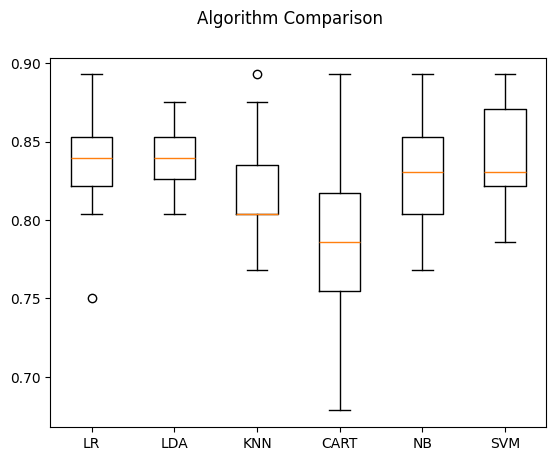

In [ ]:
# Comparação dos Algoritmos
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# Precisão do modelo no conjunto de validação
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8936170212765957
[[72 11]
 [ 4 54]]
              precision    recall  f1-score   support

         0.0       0.95      0.87      0.91        83
         1.0       0.83      0.93      0.88        58

    accuracy                           0.89       141
   macro avg       0.89      0.90      0.89       141
weighted avg       0.90      0.89      0.89       141



In [ ]:
# Precisão do modelo no conjunto de validação
svc = SVC(gamma='auto')
svc.fit(X_train, Y_train)
predictions = svc.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8652482269503546
[[71 12]
 [ 7 51]]
              precision    recall  f1-score   support

         0.0       0.91      0.86      0.88        83
         1.0       0.81      0.88      0.84        58

    accuracy                           0.87       141
   macro avg       0.86      0.87      0.86       141
weighted avg       0.87      0.87      0.87       141



In [ ]:
# Precisão do modelo no conjunto de validação
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.900709219858156
[[75  8]
 [ 6 52]]
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91        83
         1.0       0.87      0.90      0.88        58

    accuracy                           0.90       141
   macro avg       0.90      0.90      0.90       141
weighted avg       0.90      0.90      0.90       141



In [ ]:
# Precisão do modelo no conjunto de validação
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8723404255319149
[[75  8]
 [10 48]]
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89        83
         1.0       0.86      0.83      0.84        58

    accuracy                           0.87       141
   macro avg       0.87      0.87      0.87       141
weighted avg       0.87      0.87      0.87       141



In [ ]:
# Precisão do modelo no conjunto de validação
cart = DecisionTreeClassifier()
cart.fit(X_train, Y_train)
predictions = cart.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.75177304964539
[[63 20]
 [15 43]]
              precision    recall  f1-score   support

         0.0       0.81      0.76      0.78        83
         1.0       0.68      0.74      0.71        58

    accuracy                           0.75       141
   macro avg       0.75      0.75      0.75       141
weighted avg       0.76      0.75      0.75       141



In [ ]:
# Precisão do modelo no conjunto de validação
nb = GaussianNB()
nb.fit(X_train, Y_train)
predictions = nb.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8794326241134752
[[77  6]
 [11 47]]
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90        83
         1.0       0.89      0.81      0.85        58

    accuracy                           0.88       141
   macro avg       0.88      0.87      0.87       141
weighted avg       0.88      0.88      0.88       141



## Análise:

| Modelo | Acurácia (Média) - Validação Cruzada | Desvio Padrão - Validação Cruzada | Acurácia - Validação
|---|---|---|---|
| Regressão Logística (LR) | 0.832143 | 0.035892 | 0.8723 |
| Análise Linear Discriminante (LDA) | 0.841071 | 0.021797 | 0.9007 |
| K-Vizinhos Mais Próximos (KNN) | 0.819643 | 0.036986 | 0.8936 |
| Árvores de Classificação e Regressão (CART) | 0.782143 | 0.060714 | 0.7518 |
| Gaussian Naive Bayes (NB) | 0.830357 | 0.035937 | 0.8794 |
| Support Vector Machines (SVM)| 0.837500 | 0.035220 | 0.8652 |


 - O CART (Árvore de Decisão) apresentou o pior desempenho entre todos os modelos, tanto na validação cruzada quanto no conjunto de validação. Ele também possui o maior desvio padrão na validação cruzada, indicando menor estabilidade.
 - LR, NB e SVM apresentaram desempenho semelhante na validação cruzada e no conjunto de validação, com acurácias geralmente na faixa de 83-88%.
 - O KNN teve uma acurácia um pouco menor na validação cruzada, mas apresentou um desempenho muito bom no conjunto de validação (0.8936).
 - O LDA teve um desempenho consistentemente bom na validação cruzada e alcançou a maior acurácia no conjunto de validação (0.9007). Ele também possui o menor desvio padrão na validação cruzada, sugerindo que é um modelo mais estável.

## Conclusão:

Com base nos resultados do treinamento e da validação dos dados, o modelo de Análise Linear Discriminante (LDA) parece ser o melhor modelo para utilização na aplicação Cardiocheck. Foi ele que demonstrou maior acurácia e estabilidade.


